# **Classification Tree**
* Baskin Robbins nutritional information: http://www.baskinrobbins.ca/nutritional-information/
* ref: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

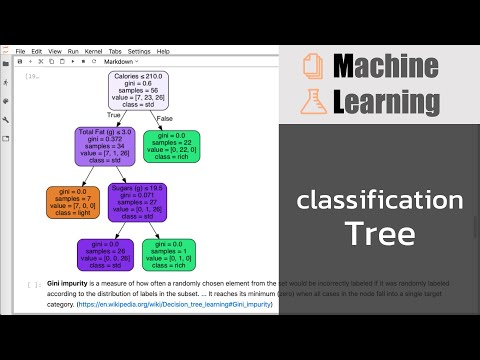

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('CrlmjqHXhqI', width=720, height=405)

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 1.1.5
numpy   version: 1.19.5
seaborn version: 0.11.1


In [7]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/baskin_robbins_classifier.csv'
df=pd.read_csv(url)
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),Category
0,Bananas Foster,160,8.0,0.2,20,16,2.0,std
1,Baseball Nut,160,9.0,0.2,19,13,3.0,std
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,std
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,std
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,light


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   Category           70 non-null     object 
dtypes: float64(3), int64(3), object(2)
memory usage: 4.5+ KB


In [9]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')

In [10]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

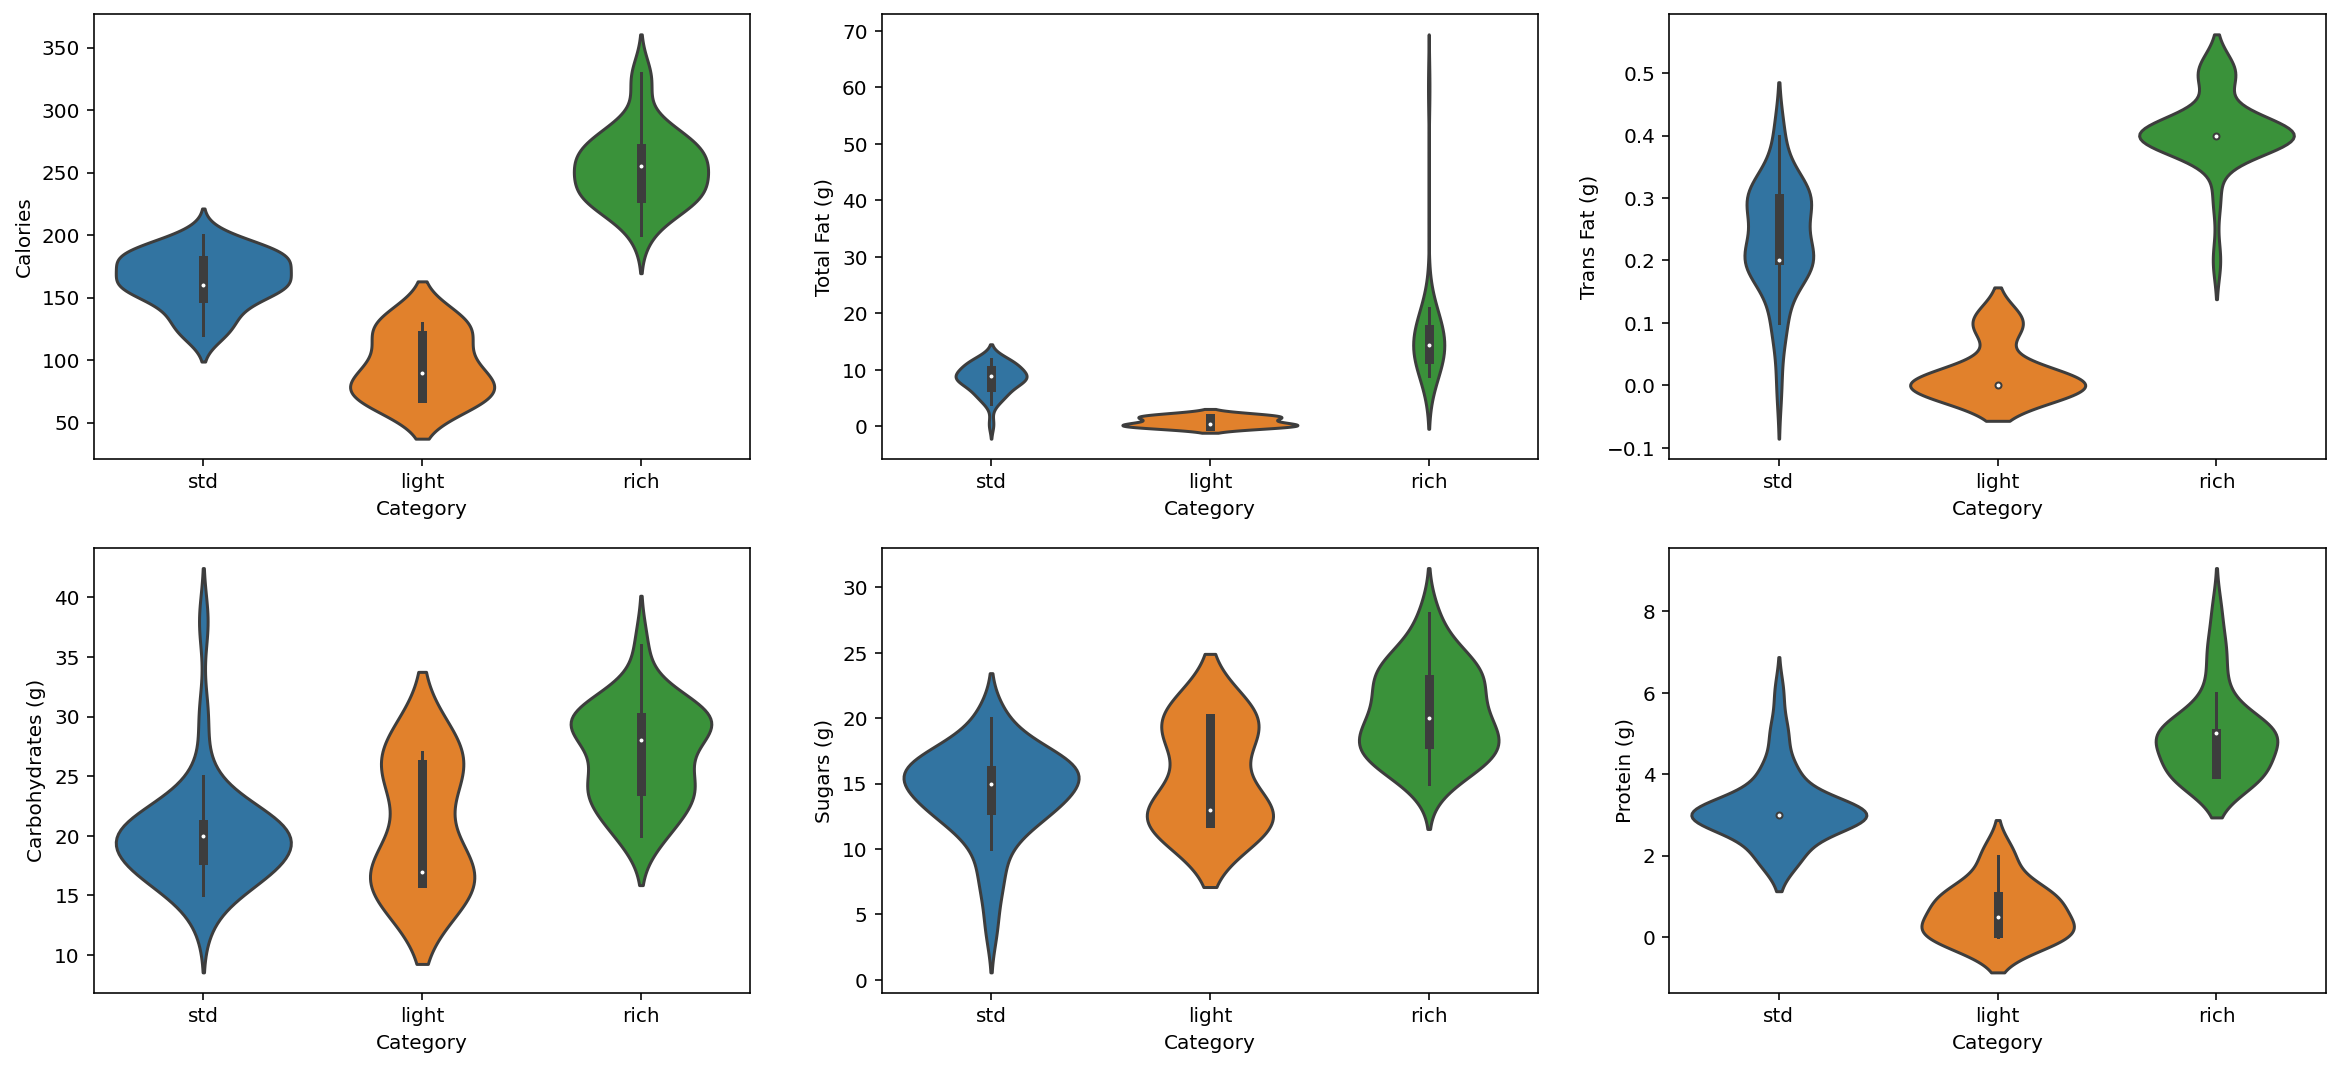

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
ax=ax.ravel()
for i, col in enumerate(cols):
    sns.violinplot(x='Category', y=col, data=df, ax=ax[i])

## **Draw Decision Tree**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, precision_recall_fscore_support, f1_score

In [13]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'Category'],
      dtype='object')

In [14]:
cols=['Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']

In [15]:
X=df[cols] # features
y=df['Category'] # label

In [16]:
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    stratify=y,
                                                    random_state=7)

In [17]:
model=DecisionTreeClassifier(criterion='gini') # gini is a default
# model=DecisionTreeClassifier(criterion='entropy')

model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
X_train.columns

Index(['Calories', 'Total Fat (g)', 'Trans Fat (g)', 'Carbohydrates (g)',
       'Sugars (g)', 'Protein (g)'],
      dtype='object')

In [19]:
model.feature_importances_

array([0.62367944, 0.31901352, 0.        , 0.        , 0.05730704,
       0.        ])

In [20]:
fs=pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fs

Calories             0.623679
Total Fat (g)        0.319014
Sugars (g)           0.057307
Protein (g)          0.000000
Carbohydrates (g)    0.000000
Trans Fat (g)        0.000000
dtype: float64

In [21]:
y_train.value_counts()

std      26
rich     23
light     7
Name: Category, dtype: int64

# **tree diagram (better way)**
**install graphviz on Windows**
1. install graphviz: pip install -U graphviz
2. download graphviz: https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/
3. extract and copy to: C:\Program Files (x86)\Graphviz\bin
4. add C:\Program Files (x86)\Graphviz\bin to PATH enviroment variable

In [22]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
clf.__dict__

{'ccp_alpha': 0.0,
 'class_weight': None,
 'classes_': array(['light', 'rich', 'std'], dtype=object),
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_features_': 6,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_classes_': 3,
 'n_features_': 6,
 'n_outputs_': 1,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best',
 'tree_': <sklearn.tree._tree.Tree at 0x7f9b1ac70b90>}

In [24]:
clf.__dict__['tree_']

In [25]:
type(clf)

sklearn.tree._classes.DecisionTreeClassifier

In [26]:
clf.__dict__['classes_']

array(['light', 'rich', 'std'], dtype=object)

In [27]:
from sklearn.tree import export_graphviz
from graphviz import Digraph, Source

def view_tree(model, X, save_tree_img=False):
    estimators=clf
    dot_graph=export_graphviz(estimators, 
                feature_names = X.columns,
                class_names = model.__dict__['classes_'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
#     with open(f'tree{tree_index}.dot') as f:
#         dot_graph = f.read()
    g=Source(dot_graph)    
    if save_tree_img:
        g.render(f'tree', format='png', view=False, cleanup=True)
    return g

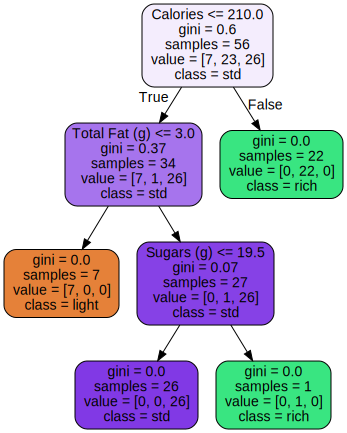

In [28]:
view_tree(clf, X_test, save_tree_img=False)

**Gini impurity** is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. ... It reaches its minimum (zero) when all cases in the node fall into a single target category. (https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity)

$$ {\displaystyle \operatorname {I} _{G}(
)=\sum _{i=1}^{J}\left(p_{i}\sum _{k\neq i}p_{k}\right)=\sum _{i=1}^{J}p_{i}(1-p_{i})=\sum _{i=1}^{J}(p_{i}-{p_{i}}^{2})=\sum _{i=1}^{J}p_{i}-\sum _{i=1}^{J}{p_{i}}^{2}=1-\sum _{i=1}^{J}{p_{i}}^{2}} $$
gini value at the top level

$$
gini=1-\left(\left(\frac{7}{56}\right)^2+\left(\frac{1}{56}\right)^2+\left(\frac{26}{56}\right)^2\right)=.6
$$

In [29]:
# from sklearn import tree
# tree.plot_tree(clf)

# **tree diagram (old way)**
* install graphviz on Windows
1. install graphviz: pip install -U graphviz
2. download graphviz: https://www2.graphviz.org/Packages/stable/windows/10/msbuild/Release/Win32/
3. extract and copy to: C:\Program Files (x86)\Graphviz\bin
4. 
add C:\Program Files (x86)\Graphviz\bin to PATH enviroment variable

In [30]:
# from sklearn.externals.six import StringIO  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

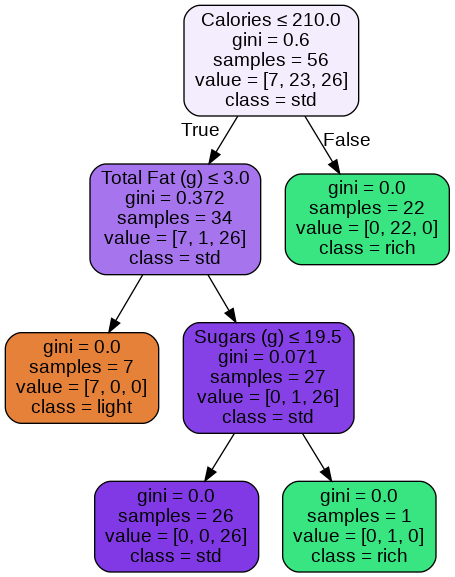

In [31]:
# credit: https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                feature_names=cols,  
                class_names=['light', 'rich', 'std'], 
                filled=True, rounded=True,  
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [32]:
cm=confusion_matrix(y_test, model.predict(X_test))
cm

array([[2, 0, 0],
       [0, 5, 0],
       [1, 1, 5]])

In [33]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

       light       0.90      1.00      0.95         9
        rich       0.97      1.00      0.98        28
         std       1.00      0.94      0.97        33

    accuracy                           0.97        70
   macro avg       0.96      0.98      0.97        70
weighted avg       0.97      0.97      0.97        70



In [34]:
model.tree_.impurity # gini

array([0.60012755, 0.37197232, 0.        , 0.07133059, 0.        ,
       0.        , 0.        ])

In [35]:
model.tree_.value

array([[[ 7., 23., 26.]],

       [[ 7.,  1., 26.]],

       [[ 7.,  0.,  0.]],

       [[ 0.,  1., 26.]],

       [[ 0.,  0., 26.]],

       [[ 0.,  1.,  0.]],

       [[ 0., 22.,  0.]]])

In [36]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D

In [37]:
# switch to interactive matplotlib
#%matplotlib qt
#%pylab qt

# switch back to inline mode
%matplotlib inline


## **3D scatter**

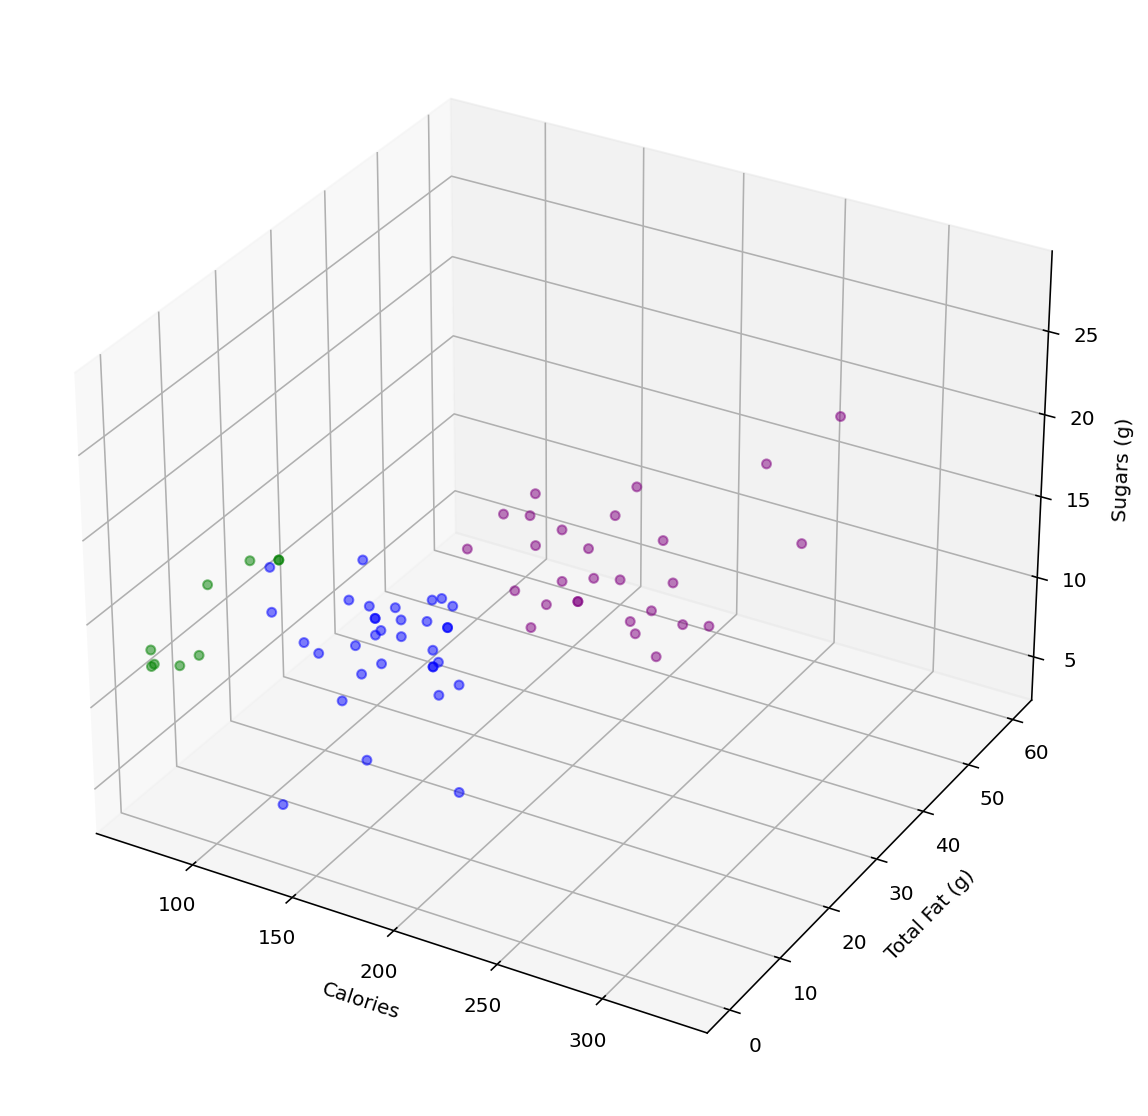

In [38]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
colors=y.map({'light': 'green', 'std': 'blue', 'rich': 'purple'})
ax.scatter(X['Calories'], X['Total Fat (g)'], X['Sugars (g)'], alpha=.5, c=colors)
ax.set_xlabel('Calories')
ax.set_ylabel('Total Fat (g)')
ax.set_zlabel('Sugars (g)');

In [39]:
predicted = model.predict(X_test)
predicted

array(['light', 'rich', 'std', 'rich', 'rich', 'std', 'std', 'rich',
       'rich', 'light', 'std', 'std', 'light', 'rich'], dtype=object)

In [40]:
pd.crosstab(y_test, predicted)

col_0,light,rich,std
Category,,,
light,2,0,0
rich,0,5,0
std,1,1,5
